<a href="https://colab.research.google.com/github/tgnanavi1/iris-dataset-prediction/blob/main/Project_20191ISE0214.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Reading the data to a dataframe

data=pd.read_csv("/content/student_scores.csv")
print(data)
print(data.shape)
print(data.describe())

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86
(25, 2)
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


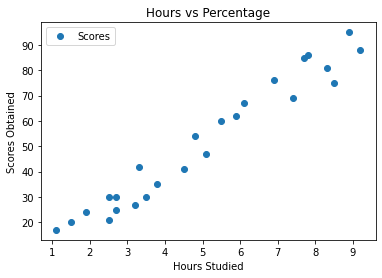

In [3]:
# Since the dataset is quiet small so visualizing the data will give a better picture of the correlation between variables.
data.plot(x="Hours",y="Scores",style='o')
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Scores Obtained")
plt.show()

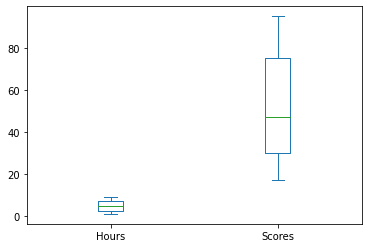

In [4]:
#From the scatter plot it can be observed that there is a positive correlation between the No. of hours studied and the scores obtained by the student
data.plot(kind='box')
plt.show()

In [5]:
#Preparing data for model
#Feature and target variables
X = data.Hours
y = data.Scores

#Splitting data into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [6]:
#Model training
#Model training

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [7]:
#Accuracy
lr.score(X_test, y_test)

0.898472051760986

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Text(0, 0.5, 'Scores')

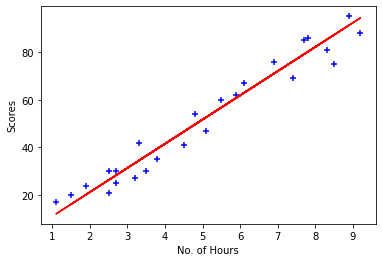

In [8]:
#Model Evaluation
#Plotting results

plt.scatter(data.Hours, data.Scores, marker = '+', color = 'blue')
plt.plot(data.Hours, lr.predict(data[['Hours']]), color = 'red')  #plotting the line of best fit
plt.xlabel('No. of Hours')
plt.ylabel('Scores')

In [9]:
#Model evluation

from sklearn import metrics

predictions = lr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5.072465261169776
MSE: 39.693366643524925
RMSE: 6.300267188264711


In [10]:
#Making predictions
#Making predictions using trained model

inp = float(input("Enter hours studied: "))
y_pred = lr.predict([[inp]])
s = str(y_pred)
print("Predicted Score: {}" .format(s[2:-2]))

Enter hours studied: 90
Predicted Score: 914.33550413
